---

# Análise exploratória de dados (*exploratory data analysis*, EDA)

 - Explorar os dados para identificar padrões de interesse
 - Trabalho de detetive, que busca pistas e evidênica a serem confirmadas numa análise inferencial (Tukey 1977)
 - Não é análise de significância estatística.
 - Se utiliza de estatística descritiva e visualização de dados.

 ---

In [ ]:
# @title carregar bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

sns.set_style("whitegrid")

# Estatística descritiva

---

![](https://fernandafperes.com.br/blog/intervalo-de-confianca/img1.png)

## População e amostra  

- **População**: Conjunto completo de elementos que queremos estudar. Pode ser, por exemplo, todos os clientes de uma empresa ou todos os habitantes de um país.  
- **Amostra**: Subconjunto da população, usado para análise quando não é viável estudar todos os elementos da população. O ato de capturar tal subconjunto de dados é chamado de "amostragem", que pode ser probabilística (aleatória simples, sistemática, estratificada e por conglomerados) ou não probabilística (por conveniência, por quotas, por julgamento, voluntária).

### Exemplo prático
O conjunto de dados `tips` contém informações de gorjetas capturadas por um garçom em um período de alguns meses quando trabalhava para um restaurante.

---

In [ ]:
# @title Leitura do conjunto de dados
df = pd.read_csv(
    'https://raw.githubusercontent.com/atlantico-academy/datasets/refs/heads/main/tips.csv'
)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


---
## Tipos de variáveis



<!-- ![](https://private-user-images.githubusercontent.com/1690232/425043989-ba094f6f-f323-4da6-a0d7-1017859b0fd4.png?jwt=eyJhbGciOiJIUzI1NiIsInR5cCI6IkpXVCJ9.eyJpc3MiOiJnaXRodWIuY29tIiwiYXVkIjoicmF3LmdpdGh1YnVzZXJjb250ZW50LmNvbSIsImtleSI6ImtleTUiLCJleHAiOjE3NDI0ODI3MTUsIm5iZiI6MTc0MjQ4MjQxNSwicGF0aCI6Ii8xNjkwMjMyLzQyNTA0Mzk4OS1iYTA5NGY2Zi1mMzIzLTRkYTYtYTBkNy0xMDE3ODU5YjBmZDQucG5nP1gtQW16LUFsZ29yaXRobT1BV1M0LUhNQUMtU0hBMjU2JlgtQW16LUNyZWRlbnRpYWw9QUtJQVZDT0RZTFNBNTNQUUs0WkElMkYyMDI1MDMyMCUyRnVzLWVhc3QtMSUyRnMzJTJGYXdzNF9yZXF1ZXN0JlgtQW16LURhdGU9MjAyNTAzMjBUMTQ1MzM1WiZYLUFtei1FeHBpcmVzPTMwMCZYLUFtei1TaWduYXR1cmU9MWIwNzQwNGNjMzQ0ZWQ3NTNhNzcwYjk4ZDY0ZmZjYjE1ODRjMjI3ZGI1ZTc1NDM0ZjFhNmUwMzNlZjgyZDdlYyZYLUFtei1TaWduZWRIZWFkZXJzPWhvc3QifQ.g9JuWF2MNb0-QLbhOCdC-HZgaeL1t-fw02Sw7sawXZI) -->

### Qualitativas (categóricas)
Representam **categorias** e não possuem valores numéricos diretamente associados. São classificados em:
- **nominais**: quando não possuem ordem específica. Por exemplo, cor dos olhos (`azul`, `verde`, `castanho`).
- **ordinais**: quando possuem uma ordem hierárquica, mnas as diferenças entre os valores não são necessariamente uniformes. Por exemplo, nível de satisfação (`baixo`, `médio`, `alto`), escolaridade (`fundamental`, `médio`, `superior`).

### Quantitativas (numéricas)

Representam números e podem ser medidas. São classificadas em:

- **Discretas**: assumem valores que vem de um conjuto enumerável (contável). Por exemplo, número de clientes atendidos (`1, 2, 3, ...`), número de quartos em uma casa (`1, 2, 3, ...`).  
- **Contínuas**: podem assumir qualquer valor dentro de um intervalo, incluindo casas decimais. Por exemplo: peso (`65.3 kg`, `72kg`, `...`), altura (`1.75 m`), tempo de espera (`12.5 minutos`).

### Outras Classificações

- **cíclicas:**: variáveis que tem início e fim e estes são conectados de forma natural, formando um ciclo. Por exemplo, mês do ano, dia da semana,
- **inútil**: variáveis que não tem contribuem para análise ou podem prejudicar algum modelo de previsão. Exemplos: valores constantes, identificadores únicos, redundantes, variáveis com muitos valores faltantes.

---

In [ ]:
# Criação do dicionário de dados
df_dict = pd.DataFrame([
    {
        "variavel": "total_bill",
        "descricao": "Total pago da conta em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "tip",
        "descricao": "Valor da gorjeta dada ao garçom em dólares.",
        "tipo": "quantitativa",
        "subtipo": "contínua",
    },
    {
        "variavel": "sex",
        "descricao": "Gênero do cliente (Male/Female).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "smoker",
        "descricao": "Indica se o cliente é fumante (Yes/No).",
        "tipo": "qualitativa",
        "subtipo": "binária",
    },
    {
        "variavel": "day",
        "descricao": "Dia da semana da refeição (Thur, Fri, Sat, Sun).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "time",
        "descricao": "Período do dia em que ocorreu a refeição (Lunch/Dinner).",
        "tipo": "qualitativa",
        "subtipo": "nominal",
    },
    {
        "variavel": "size",
        "descricao": "Número de pessoas na mesa.",
        "tipo": "quantitativa",
        "subtipo": "discreta",
    }
])

## Quartil, quantil e percentil

 - **Quantil**: divide os dados em "n" partes iguais; Exemplos: quartil, decil, percentil ou centil.
 - **Percentil (ou centil)**: divide os dados ordenados em 100 partes; P1 = abaixo do qual está 1% dos dados; P42 = abaixo do qual está 42% dos dados.
 - **Quartil**: divide os dados ordenados em quatro partes; Q1 = P25, Q2 = P50, Q3 = P75.


In [ ]:
# calcular percentis e quartis
q1 = df.total_bill.quantile(0.25)
q2 = df.total_bill.quantile(0.5)
q3 = df.total_bill.quantile(0.75)

print(q1)
print(q2)
print(q3)

13.3475
17.795
24.127499999999998


---

## Medidas de tendência central

Considere o seguinte conjunto de dados $X = \{x_i\}_{i=1}^{n}$ para as definições a seguir:

 - **Moda** ($x^*$): valor que ocorre com maior frequência em um conjunto de dados.
 - **Média** ($\bar{x}$): soma de todos os valores dividida pelo número total de observações:
 $$
 \bar{x} = \frac{\sum_{i=1}^{n} x_i}{n}
 $$
 - **Mediana** ($Q_2$): ponto médio dos dados, em que, quando ordenados, 50% das observações são maiores que ela e 50% são menores. Quando $n$ é impar, a mediana é igual a média aritimética dos valores centrais.


<!-- | Medida   | Descrição | Uso |
|----------|----------|-----|
| **Moda** | Valor mais frequente | Melhor para variáveis categóricas |
| **Mediana** | Valor central dos dados ordenados | Útil para dados com outliers |
| **Média** | Média aritmética dos valores | Mais comum, mas sensível a outliers | -->


### Exemplo
Para o seguinte conjunto $X = \{2, 3, 3, 2, 4\}$, qual a média, mediana e moda?

---

In [ ]:
# Exemplos
valores = np.array([2, 3, 3, 2, 50])
# print(valores)

# calcular estatísticas de tendência central
print('média', np.mean(valores))
print('mediana', np.median(valores))
# print('moda', np.mode(valores))

média 12.0
mediana 3.0


In [ ]:
# calcular estatísticas de tendência central no pandas
df.total_bill.describe()



,total_bill
count,244.000000
mean,19.785943
std,8.902412
min,3.070000
25%,13.347500
50%,17.795000
75%,24.127500
max,50.810000


---

## Medidas de dispersão

 - **Amplitude ($A$)**: diferença entre o maior e o menor valor do conjunto de dados. Simples e rápida para ter uma noção geral da variação dos dados.
 $$ A = x_{max} - x_{min} $$  
 - **Intervalo Interquartil (IQR)**: diferença entre o terceiro quartil ($Q_3$) e o primeiro quartil ($Q_1$). Muito usado para detectar outliers e em boxplots.
 $$ IQR = Q_3 - Q_1 $$  
 - **Desvio Médio Absoluto (DMA)**: média das distâncias absolutas entre os valores e a média. Alternativa ao desvio padrão quando queremos uma medida menos sensível a valores extremos.
 $$ DMA = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}| $$  
 - **Variância ($s^2$ ou $\sigma^2$)**: média dos quadrados das diferenças em relação à média. Usada em modelos estatísticos, análise de variabilidade e testes de hipóteses.
 $$ s^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$
 - **Desvio Padrão ($s$ ou $\sigma$)**: mede o quanto os valores se afastam da média. Muito utilizado em estatística inferencial, aprendizado de máquina e controle de qualidade.
 $$ s = \sqrt{\text{Variância}} = \sqrt{s^2} $$

---

In [ ]:
 # amplitude
amplitude = df.total_bill.max() - df.total_bill.min()

# intervalo interquartil
iqr = df.total_bill.quantile(0.75) - df.total_bill.quantile(.25)

# desvio médio absoluto
dma = np.mean(np.abs(df.total_bill - df.total_bill.mean()))

# variância
var_total_bill = df.total_bill.std() ** 2

# desvio padrão
std_total_bill = df.total_bill.std()

cv_total_bill = df.total_bill.std() / df.total_bill.mean()

print(amplitude)
print(iqr)
print(dma)
print(var_total_bill)
print(f"{std_total_bill:.2f}")

47.74
10.779999999999998
6.8694400026874485
79.25293861397826
8.90


---
## Medidas adicionais

### Relativas

 - **Coeficiente de variação**:
 $$ CV = \frac{s}{\bar{x}} $$
 - **Escore padronizado**: quantidade de desvios padrão de distância da média.
 $$ z_n = \frac{x_n - \bar{x}}{s} $$

### Assimetria

 - **Coeficiente de assimetria de Pearson**: mede a assimetria da distribuição comparando a média e a moda ou a média e a mediana.
$$
e = \frac{\bar{x} - x^*}{s}
$$
 - **Coeficiente de assimetria de Bowley**: baseia-se nos quartis para medir a assimetria, sendo menos sensível a outliers do que o coeficiente de Pearson.
 $$
 B = \frac{(Q_3 - Q_2) - (Q_2 - Q_1)}{Q_3 - Q_1}
 $$

### Correlação

 - **Coeficiente de Assimetria de Pearson**: mede a assimetria da distribuição comparando a média e a moda ou a média e a mediana.
$$
r = \frac{\sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum_{i=1}^{n} (x_i - \bar{x})^2 \sum_{i=1}^{n} (y_i - \bar{y})^2}}
$$

In [ ]:
# exemplo
x = np.array([293.6, 298.7, 294.1, 299.6, 303.0, 300.3 , 300.1, 294.0, 302.4, 296.5])
y = np.array([995.6, 998.3, 993.2, 996.8, 997.8, 994.1, 993.3, 999.2, 1001.9, 999.7])

# desvio padrão

# coenficiente de variação



# Introdução a visualização de dados


## Estatística descritiva é o suficiente?

In [ ]:
# o quarteto anscombe
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [ ]:
# algumas estatísticas
display(anscombe.groupby("dataset").agg(["mean", "std"]))
display(anscombe.groupby("dataset")[["x", "y"]].apply(lambda group: group["x"].corr(group["y"])))

x                   y          
        mean       std      mean       std
dataset                                   
I        9.0  3.316625  7.500909  2.031568
II       9.0  3.316625  7.500909  2.031657
III      9.0  3.316625  7.500000  2.030424
IV       9.0  3.316625  7.500909  2.030579

,0
dataset,
I,0.816421
II,0.816237
III,0.816287
IV,0.816521


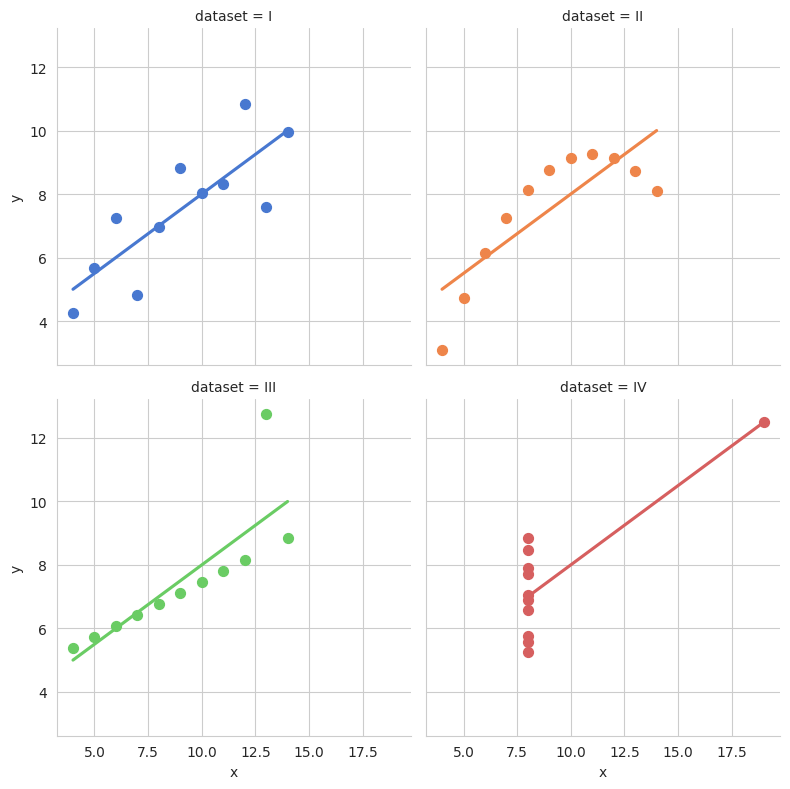

In [ ]:
sns.lmplot(
    data=anscombe, x="x", y="y", col="dataset", hue="dataset",
    col_wrap=2, palette="muted", ci=None,
    height=4, scatter_kws={"s": 50, "alpha": 1}
)
plt.show()

---
## O bom, o ruim, o feio e o errado

![](https://clauswilke.com/dataviz/introduction_files/figure-html/ugly-bad-wrong-examples-1.png)

 - **Ruim**: versão enganosa do gráfico bom; Escalas diferentes dão uma impressão errada da informação.
 - **Errado**: Versão incorreta do gráfico bom; Não há forma de verificar os valores e intervalos.
 - **Feio**: tecnicamente correto; Não é esteticamente agradável e tem muita informação sem necessidade.
---

## Qual gráfico escolher?

![](https://vdsbook.com/Figures-External/eda/data_viz_simplified.png)

---

## Anatomia de uma figura (`matplotlib` e `seaborn`)

<div align=center>
<img src="https://www.scaler.com/topics/images/matplotlib-plots-anatomy.webp" align="center"/>
</div>

<div align=center>
<img src="https://matplotlib.org/stable/_images/sphx_glr_anatomy_001.png" align="center"/>
</div>

## Gráficos usando o seaborn
<div align=center>
<img src="https://seaborn.pydata.org/_images/function_overview_8_0.png" align="center"/>
</div>



## Quantidades
 - Gráfico de barras: agrupadas, ~empilhadas~,
 - Gráficos de pontos
 - Heatmap

In [ ]:
filmes = pd.DataFrame([
    {"titulo": "A escolha perfeita 3", "lucro": 19928525},
    {"titulo": "Jumanji", "lucro": 36169328},
    {"titulo": "O touro ferdinando", "lucro": 7316746},
    {"titulo": "O rei do show", "lucro": 8805843},
    {"titulo": "Star Wars", "lucro": 71565498},
])
filmes.head()

,titulo,lucro
0,A escolha perfeita 3,19928525
1,Jumanji,36169328
2,O touro ferdinando,7316746
3,O rei do show,8805843
4,Star Wars,71565498


<Axes: xlabel='titulo', ylabel='lucro'>

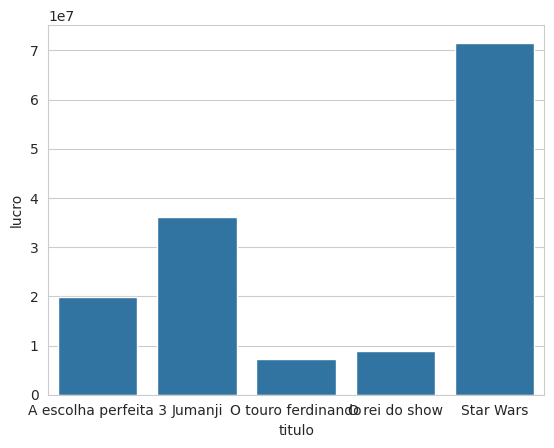

In [ ]:
# gráfico simples, padrão
sns.barplot(data=filmes, x='titulo', y='lucro')

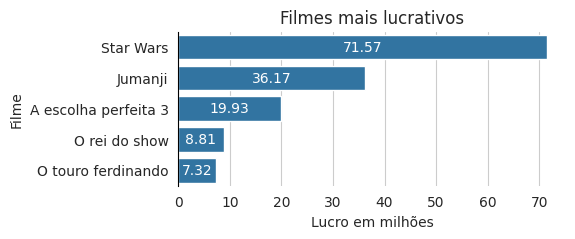

In [ ]:
# gráfico melhorado
filmes['lucro_milhoes'] = filmes["lucro"] / 1000000

fig = plt.figure(figsize=(5,2))

ax = sns.barplot(data=filmes.sort_values(by="lucro_milhoes", ascending=False), x='lucro_milhoes', y='titulo')
ax.set(
    title="Filmes mais lucrativos",
    xlabel="Lucro em milhões",
    ylabel="Filme"
)
ax.bar_label(ax.containers[0], fmt="%.2f", color="white", label_type="center")
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.spines["left"].set_color("black")


plt.show()

In [ ]:
# plotar gráfico de pontos


In [ ]:
# plotar mapa de calor

## Distribuições: `sns.countplot()`, `sns.histplot()`, `sns.boxplot()`
 - Histogramas
 - Densidade
 - Diagramas de caixa: boxplot, violinplot, strip

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


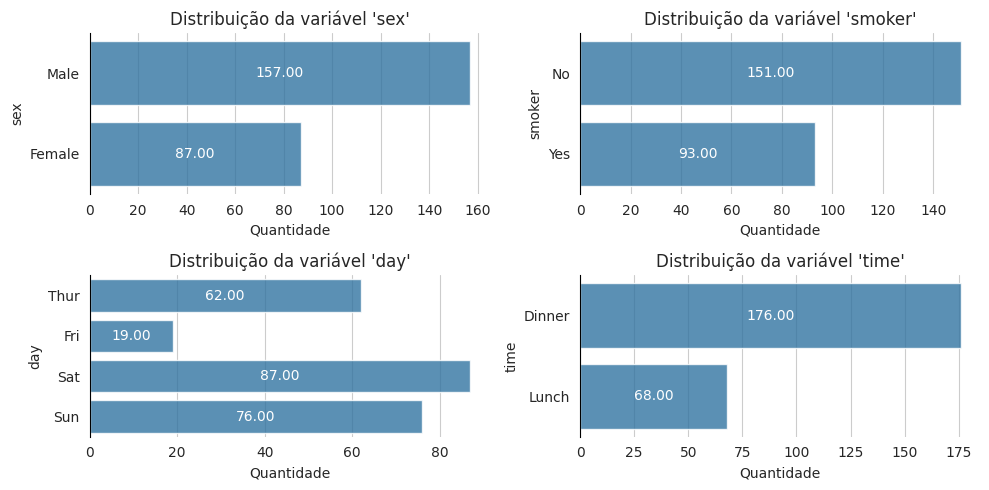

In [ ]:
# selecionar variáveis (qualitativas)
variaveis_qualitativas = df_dict.query('tipo == "qualitativa"').variavel.to_list()
# criar figura (subplots)
fig, axes = plt.subplots(figsize=(10,5), ncols=2, nrows=2)
axes = axes.flatten()
# plotar gráficos de histograma (um por um)
for i, axe in enumerate(axes):
    if variaveis_qualitativas[i] == "day":
        order = ["Thur", "Fri", "Sat", "Sun"]
    else:
        order = df[variaveis_qualitativas[i]].value_counts().index
    ax = sns.countplot(data=df, y=variaveis_qualitativas[i], ax=axe, order=order, alpha=0.8)
    ax.bar_label(ax.containers[0], fmt="%.2f", color="white", label_type="center")
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_color("black")
    ax.set(
        title=f"Distribuição da variável '{variaveis_qualitativas[i]}'",
        xlabel="Quantidade",
    )

plt.tight_layout()
plt.show()

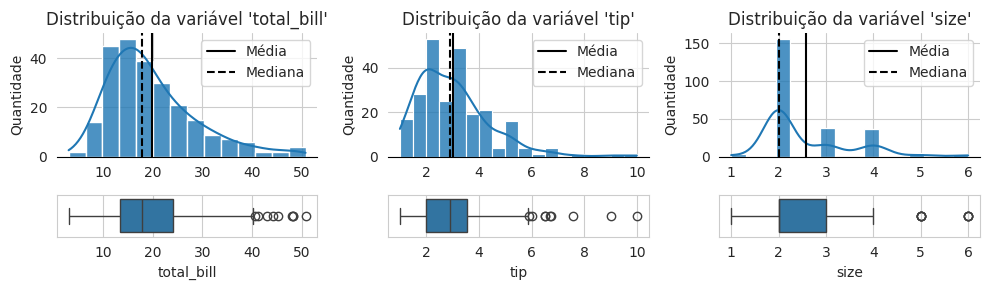

In [ ]:
# selecionar variáveis (quantitativa)
variaveis_quantitativas = df_dict.query('tipo == "quantitativa"').variavel.to_list()
# # criar figura (subplots)
fig, axes = plt.subplots(figsize=(10,3), ncols=3, nrows=2, gridspec_kw={"height_ratios": [3, 1]})
# axes = axes.flatten()
# # plotar gráficos de histograma (um por um)
for i, variavel in enumerate(variaveis_quantitativas):
    ax1 = sns.histplot(data=df, x=variavel, ax=axes[0, i], alpha=0.8, kde=True)
    ax1.axvline(df[variavel].mean(), color='black', label="Média")
    ax1.axvline(df[variavel].median(), color='black', linestyle="--", label="Mediana")
    ax1.set(title=f"Distribuição da variável '{variavel}'", ylabel='Quantidade', xlabel="")
    ax1.legend()
    ax1.spines["top"].set_visible(False)
    ax1.spines["right"].set_visible(False)
    ax1.spines["bottom"].set_color("black")
    ax1.spines["left"].set_visible(False)

    ax2 = sns.boxplot(data=df, x=variavel, ax=axes[1, i])


#     ax.bar_label(ax.containers[0], fmt="%.2f", color="white", label_type="center")
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["bottom"].set_visible(False)
#     ax.spines["left"].set_color("black")
#     ax.set(
#         title=f"Distribuição da variável '{variaveis_qualitativas[i]}'",
#         xlabel="Quantidade",
#     )

plt.tight_layout()
plt.show()

## Associações `sns.relplot()`, `sns.jointplot()`, `sns.pairplot()`, `sns.regplot()`
 - Gráficos de dispersão
 - Gráficos de linha

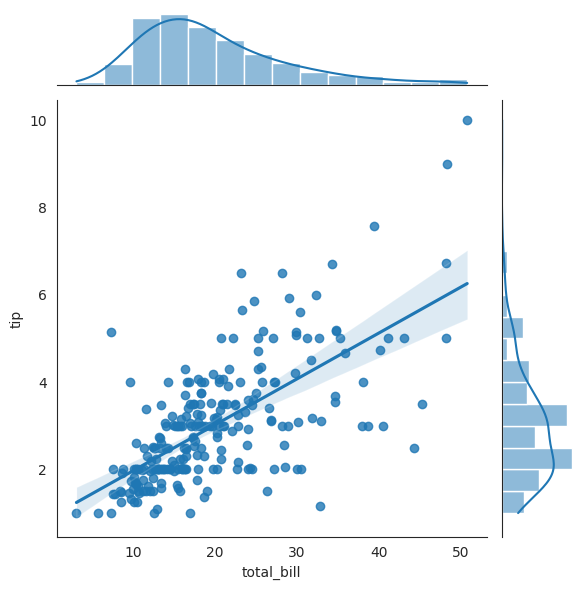

In [ ]:
# associação entre duas variáveis
sns.set_style("white")
sns.jointplot(
    data=df, x='total_bill', y='tip',
    kind='reg',
    # joint_kws={"hue": df["size"]}
)
# sns.relplot(data=df, kind='scatter', hue='sex')
plt.show()

[]

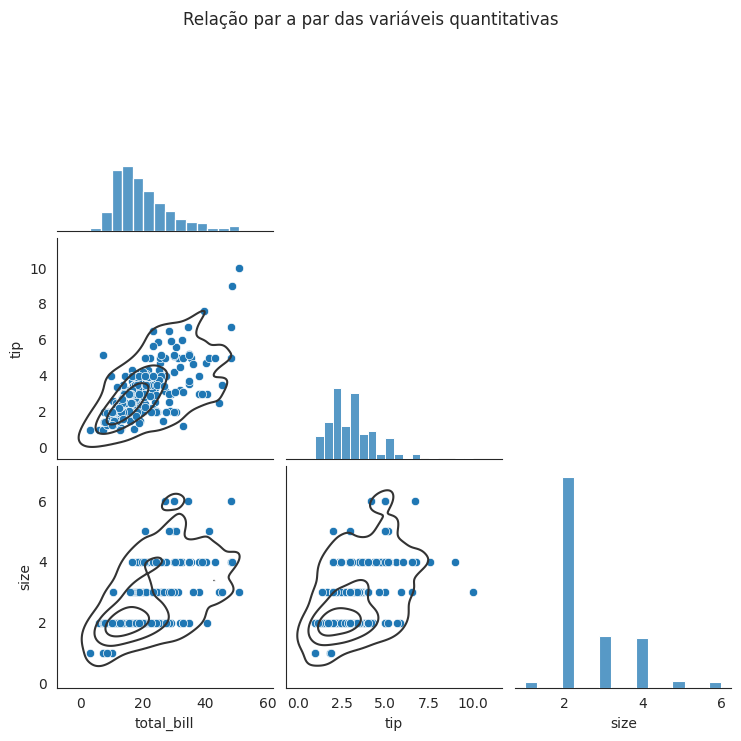

In [ ]:
# associação dois a dois
g = sns.pairplot(data=df, corner=True)
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.suptitle("Relação par a par das variáveis quantitativas")
plt.plot()

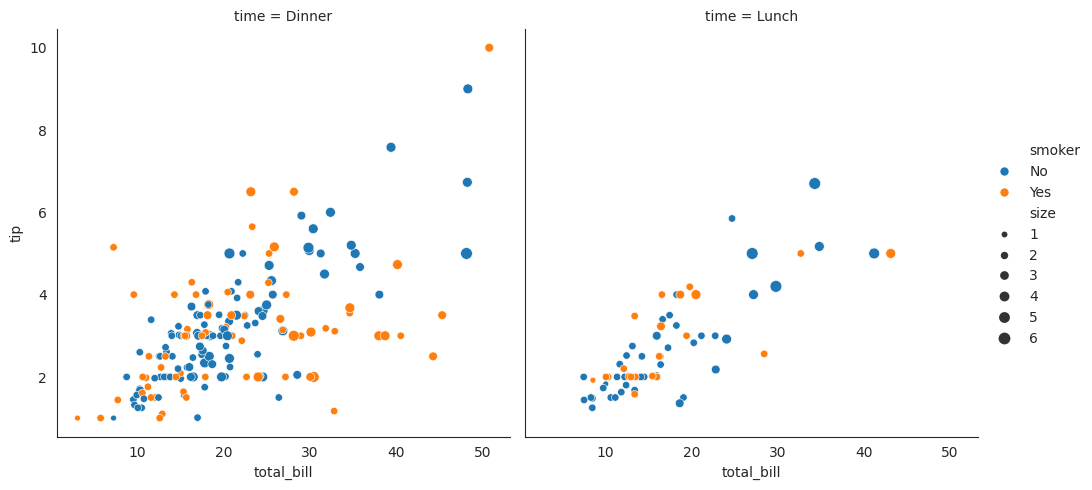

In [ ]:
# uso de diferentes canais (codificação de informação)
sns.relplot(
    data=df, x='total_bill', y='tip',
    col="time", hue="smoker",
    kind='scatter', size='size'
)
plt.show()

### Proporções
 - ~Pizza~: únicos e multiplos
 - Barras: agrupadas, ~empilhadas~
 - Densidade empilhada

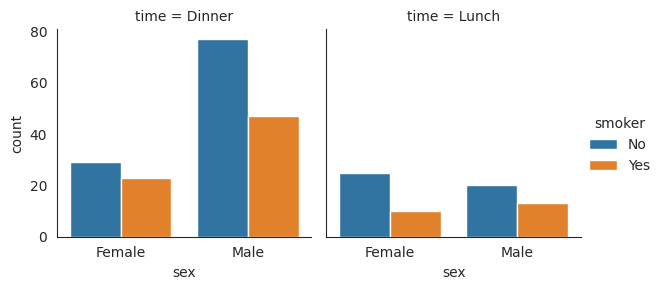

In [ ]:
# gráfico de barras agrupadas
g = sns.catplot(data=df, x='sex', hue='smoker', kind="count", col="time", height=3)#, aspect=.6,)

# for ax in g.axes.flat:
#     for container in ax.containers:
#         ax.bar_label(container, fmt="%d", color="white", label_type="center")
#     ax.spines["top"].set_visible(False)
#     ax.spines["right"].set_visible(False)
#     ax.spines["left"].set_visible(False)
#     ax.spines["bottom"].set_color("black")
plt.show()

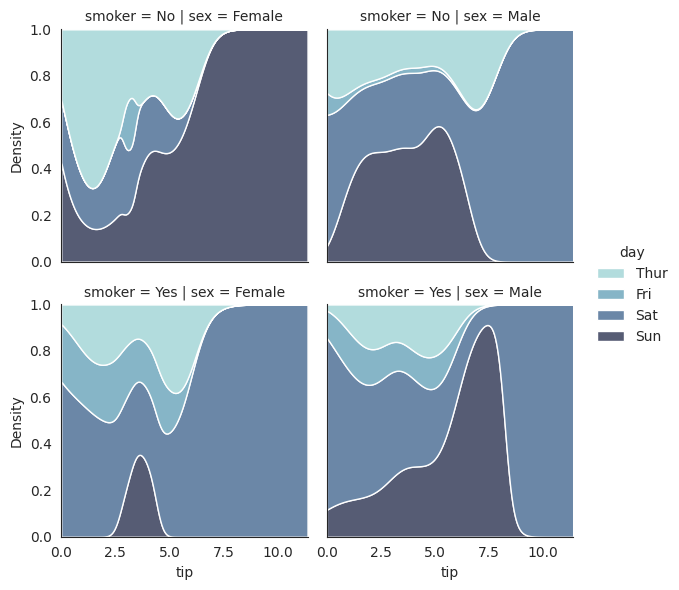

In [ ]:
# gráfico de densidade empilhada
# Plot the distribution of clarity ratings, conditional on carat
sns.displot(
    data=df,
    x="tip", hue="day",
    kind="kde",
    height=3,
    row='smoker',
    multiple="fill", clip=(0, None),
    palette="ch:rot=-.25,hue=1,light=.75",
    col='sex',
    hue_order=["Thur", "Fri", "Sat", "Sun"]
)
plt.show()

## Outros
 - Heatmap: Correlação

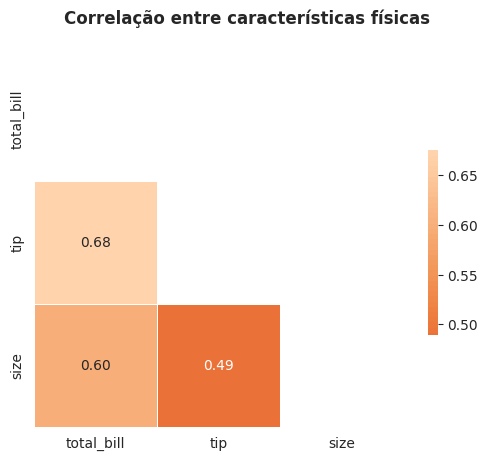

In [ ]:
corr = df.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))


# plt.figure(figsize=(4,4))
ax = sns.heatmap(
    corr,
    mask=mask,
    center=0,
    square=True,
    linewidths=.5,
    cbar_kws={"shrink": .5},
    annot=True,
    fmt=".2f"
)
ax.grid(False)

plt.suptitle(f"Correlação entre características físicas", fontweight='bold')
plt.show()

# Links importantes
 - [The Python Graph Gallery](https://python-graph-gallery.com/)
 - [Visualizing nested proportions](https://clauswilke.com/dataviz/nested-proportions.html)
 - [Galery - seaborn](https://seaborn.pydata.org/examples/index.html)
 - [Overview of seaborn plotting functions](https://seaborn.pydata.org/tutorial/function_overview.html)
 - [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)
 - [Seaborn Color Palettes and How to Use Them](https://r02b.github.io/seaborn_palettes/)